#### *Installing and Importing Libraries*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import re
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
le = LabelEncoder()
mlb = MultiLabelBinarizer()

## ***1 - Data Loading***

In [3]:
job_salary_df = pd.read_csv('Job_Salary_Prediction_Dataset.csv')

## ***2 - Data Overview Exploration***

#### *Displaying First Fifteen Rows*

In [4]:
job_salary_df.head(15)

,Job Id,Experience,Qualifications,Salary Range,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,Job Description,Benefits,skills,Responsibilities,Company
0,1.089840e+15,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,Intern,26801,4/24/2022,Female,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises
1,3.984540e+14,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,Intern,100340,12/19/2022,Female,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group
2,4.816400e+14,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",Temporary,84525,9/14/2022,Male,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.
3,6.881930e+14,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,Full-Time,129896,2/25/2023,Female,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess
4,1.170580e+14,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,Intern,53944,10/11/2022,Female,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy
5,1.168310e+14,4 to 12 Years,MCA,$59K-$93K,Brussels,Belgium,Full-Time,23196,7/25/2023,Male,Software Tester,Quality Assurance Analyst,A Quality Assurance Analyst tests software and...,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,Adani Ports and Special Economic Zone
6,1.292170e+15,3 to 15 Years,PhD,$63K-$103K,George Town,Cayman Islands,Temporary,26119,4/10/2023,Both,Teacher,Classroom Teacher,A Classroom Teacher educates students in a spe...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Teaching pedagogy Classroom management Curricu...,"Plan and deliver engaging lessons, adapting te...",FedEx
7,1.498780e+15,2 to 8 Years,M.Com,$65K-$102K,SÃ£o TomÃ©,Sao Tome and Principe,Contract,40558,9/20/2022,Female,UX/UI Designer,User Interface Designer,User Interface Designers focus on the visual a...,"{'Employee Assistance Programs (EAP), Tuition ...",UI design principles and best practices Graphi...,Create visually appealing user interfaces (UI)...,Ryder System
8,1.680290e+15,2 to 9 Years,BBA,$65K-$102K,Male,Maldives,Temporary,105343,2/19/2022,Female,UX/UI Designer,Interaction Designer,Interaction Designers specialize in designing ...,"{'Transportation Benefits, Professional Develo...",Interaction design principles User behavior an...,"Work on interaction design, defining how users...",Zee Entertainment Enterprises
9,2.556280e+14,1 to 10 Years,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,Full-Time,102069,5/13/2022,Both,Wedding Planner,Wedding Consultant,A Wedding Consultant assists couples in planni...,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,Offer expert advice and guidance to couples pl...,CSX


#### *Displaying No. of Rows and Columns*

In [5]:
print(f"Rows: {job_salary_df.shape[0]}, Columns: {job_salary_df.shape[1]}")

Rows: 1048575, Columns: 17


#### *Displaying Summary of Non-Missing Values and Data Types of Columns*

In [6]:
job_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1048575 non-null  float64
 1   Experience        1048575 non-null  object 
 2   Qualifications    1048575 non-null  object 
 3   Salary Range      1048575 non-null  object 
 4   location          1048575 non-null  object 
 5   Country           1048575 non-null  object 
 6   Work Type         1048575 non-null  object 
 7   Company Size      1048575 non-null  int64  
 8   Job Posting Date  1048575 non-null  object 
 9   Preference        1048575 non-null  object 
 10  Job Title         1048575 non-null  object 
 11  Role              1048575 non-null  object 
 12  Job Description   1048575 non-null  object 
 13  Benefits          1048575 non-null  object 
 14  skills            1048575 non-null  object 
 15  Responsibilities  1048575 non-null  object 
 16  

#### *Displaying Summary Statistics of Numerical Columns*

In [7]:
job_salary_df.describe()

,Job Id,Company Size
count,1.048575e+06,1.048575e+06
mean,1.549784e+15,7.370591e+04
std,8.948046e+14,3.530437e+04
min,1.817950e+11,1.264600e+04
25%,7.746125e+14,4.312100e+04
50%,1.549470e+15,7.364100e+04
75%,2.325065e+15,1.043175e+05
max,3.099620e+15,1.348340e+05


## ***3 - Data Cleaning***

### ***Feature Selection - Dropping Unnecssary Columns***

#### *Dropping Job ID*

#### *Reasons*
* It Has No Predictive Value
* It Can Mislead the Model

In [8]:
job_salary_df.drop('Job Id', axis=1, inplace=True)

#### *Dropping Job Description*

#### *Reasons*
* Contains Unstructured Textual Data 
* Job Description Column Contains Repititive and Generic Descriptions of Job Role
* Each Distinct Role has Exactly One Corresponding Job Description
* Job Description is a One-to-One textual Mapping of the Role Column
* Job Description increase Noise & Complexity

In [9]:
job_salary_df["Role"].nunique()

376

In [10]:
print((job_salary_df.groupby('Role')['Job Description'].nunique() == 1).sum())


376


In [11]:
job_salary_df.drop('Job Description', axis=1, inplace=True)

#### *Dropping Skills*

#### *Reasons*
* Contains Unstructured Textual Data 
* Skills Column Contains Generic Skills Related to Job Role
* Each Distinct Role has Exactly One Corresponding Skills
* Skills is a One-to-One textual Mapping of the Role Column
* Skills increase Noise & Complexity

In [12]:
job_salary_df["Role"].nunique()

376

In [13]:
print((job_salary_df.groupby('Role')['skills'].nunique() == 1).sum())

376


In [14]:
job_salary_df.drop('skills', axis=1, inplace=True)

#### *Dropping Responsibilities*

#### *Reasons*
* Contains Unstructured Textual Data 
* Responsibilities Column Contains Generic Responsibilities Information Related to Job Role
* Each Distinct Role has Exactly One Corresponding Responsibility
* Responsibilities is a One-to-One textual Mapping of the Role Column
* Responsibilities increase Noise & Complexity

In [15]:
job_salary_df["Role"].nunique()

376

In [16]:
print((job_salary_df.groupby('Role')['Responsibilities'].nunique() == 1).sum())

376


In [17]:
job_salary_df.drop('Responsibilities', axis=1, inplace=True)

### ***Handling Missing Values***

#### *No Missing Value*

In [18]:
job_salary_df.isnull().sum()

Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Job Title           0
Role                0
Benefits            0
Company             0
dtype: int64

### ***Handling Duplicate Enteries / Records***

#### *No Duplicate Enteries / Records*

In [19]:
print(job_salary_df.duplicated().sum())

0


## ***4 - Data Transformation***

#### *Transforming Experience Column*
#### *Details*
* Transforming Experience Column into 2 Columns i.e. Min Experience and Max Experience
* 1 to 5 Years -> Min Experience : 1 , Max Experience : 5
#### *Reasons*
* Numerical Format is Required for Model Training to Identify Patterns
* Preserve Complete Information by Keeping Both Lower Bound and Upper Bound
* Allows Model to Learn How Minimum and Maximum Experience Impact Salary Prediction  

In [20]:
print(job_salary_df["Experience"].unique())

['5 to 15 Years' '2 to 12 Years' '0 to 12 Years' '4 to 11 Years'
 '1 to 12 Years' '4 to 12 Years' '3 to 15 Years' '2 to 8 Years'
 '2 to 9 Years' '1 to 10 Years' '3 to 10 Years' '1 to 8 Years'
 '1 to 9 Years' '5 to 14 Years' '0 to 11 Years' '3 to 12 Years'
 '5 to 9 Years' '0 to 15 Years' '0 to 10 Years' '2 to 14 Years'
 '3 to 9 Years' '4 to 15 Years' '2 to 10 Years' '4 to 8 Years'
 '3 to 8 Years' '1 to 14 Years' '1 to 13 Years' '0 to 8 Years'
 '5 to 10 Years' '2 to 13 Years' '4 to 9 Years' '1 to 15 Years'
 '4 to 10 Years' '5 to 12 Years' '0 to 13 Years' '4 to 14 Years'
 '1 to 11 Years' '4 to 13 Years' '0 to 9 Years' '5 to 8 Years'
 '2 to 15 Years' '5 to 13 Years' '5 to 11 Years' '0 to 14 Years'
 '3 to 13 Years' '2 to 11 Years' '3 to 11 Years' '3 to 14 Years']


In [21]:
def transformExperience(exp):
    numbers = list(map(int, re.findall(r'\d+', exp)))
    # Return minimum and maximum experience
    return numbers[0], numbers[1]

In [22]:
job_salary_df[['Min Experience', 'Max Experience']] = job_salary_df['Experience'].apply(
    lambda x: pd.Series(transformExperience(x))
)

In [23]:
job_salary_df.drop('Experience', axis=1, inplace=True)

#### *Transforming Salary Range Column*
#### *Details*
* Transforming Salary Range Column into Salary Column by Computing the Mean of Minimum and Maximum Salary Range 
#### *Reasons*
* Simplifies Target Variable
* Removes Ambiguity and Uncertainity During Model Training by Giving a Specific Learnable Value
* Prevents Model Confusion by Providing a Single-Valued Target Variable
* Minimize Overfitting

In [24]:
print(job_salary_df["Salary Range"].nunique())

561


In [25]:
job_salary_df[['min_salary', 'max_salary']] = job_salary_df['Salary Range']\
    .str.extract(r'\$(\d+)K-\$(\d+)K').astype(float)*1000

In [26]:
job_salary_df['Salary'] = (job_salary_df['min_salary'] + job_salary_df['max_salary']) / 2

In [27]:
job_salary_df.drop(columns=['Salary Range', 'min_salary', 'max_salary'], inplace=True)

#### *Transforming Job Posting Date Column*
#### *Details*
* Transforming Job Posting Date Column is Transformed into 2 Columns : 
1.  Job Post Age (Days)
2. Job Posting Year
#### *Reasons*
* Numeric Format for Models
* Captures Market Trends and Time Relevance
* Older Job Posts might offer Less Salaries
* Job Post Age (Days) - Gives a Continuous Numeric Feature Showing How Old the Job Posting Is
* Job Posting Year - Captures Year-Wise Hiring Patterns or Trends

In [28]:
job_salary_df['Job Posting Date'] = pd.to_datetime(job_salary_df['Job Posting Date'])

In [29]:
today = pd.to_datetime('today')
job_salary_df['Job Post Age (Days)'] = (today - job_salary_df['Job Posting Date']).dt.days

In [30]:
job_salary_df['Job Posting Year'] = job_salary_df['Job Posting Date'].dt.year


In [31]:
job_salary_df.drop(columns=['Job Posting Date'], inplace=True)

#### *Combining Location and Country*
#### *Details*
* Combining Location Column and Country Column into Location Column

#### *Reasons*
* Location Captures Complete Specific Location Information in One Signal
* Directly Captures the Relationship Between Geographic Location and Salary
* Reduces Noise & Redundancy

In [32]:
job_salary_df['Location'] = job_salary_df['Country'] + ' - ' + job_salary_df['location']

In [33]:
job_salary_df.drop(columns=['Country','location'], inplace=True)

#### *Combining Job Title and Role Column*
#### *Details*
* Combining Job Title Column and Role Column into Job Profile Column

#### *Reasons*
* Job Title and Role are Very Closely Related
* Job Profile Captures Complete Specific Position Information in One Signal
* Reduces Sparsity
* Reduces Noise & Redundancy

In [34]:
job_salary_df['Job Profile'] = job_salary_df['Job Title'] + ' - ' + job_salary_df['Role']

In [35]:
job_salary_df.drop(columns=['Job Title','Role'], inplace=True)

#### *Storing DataFrame for Visualization*

In [36]:
job_salary_df_visualization = job_salary_df.copy()

#### *Transforming Qualifications Column*
#### *Details*
* Applying One-Hot Encoding
#### *Reasons*
* No Natural Order in Qualifications
* Assuming a Strict Hierarchy might Mislead the Model
* Different Qualifications have Different Values
* Qualifications Do not Necessarily Follows a Strict Linear Order in terms of Salary
* The Relevance of a Qualification can depend on the Industry , the Job Role , and the Specific Company's Requirement

In [37]:
print(job_salary_df["Qualifications"].unique())

['M.Tech' 'BCA' 'PhD' 'MBA' 'MCA' 'M.Com' 'BBA' 'B.Tech' 'B.Com' 'BA']


In [38]:
job_salary_df = pd.get_dummies(job_salary_df, columns=['Qualifications'], prefix='Qual')


#### *Transforming Location and Country*
#### *Details*
* Applying Target Mean Encoding on Location Column

#### *Reasons*
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Roles
* Improves Model Accuracy

In [40]:
location_mean = job_salary_df.groupby('Location')['Salary'].mean()

job_salary_df['Location Encoded'] = job_salary_df['Location'].map(location_mean)

In [41]:
job_salary_df.drop(columns=['Location'], inplace=True)

#### *Transforming Work Type Column*
#### *Details*
* Applying Custom Label Encoding
#### *Reasons*
* Avoids Unnecessary Columns and Reduces Model Complexity
* Captures Ordinal Relationship

In [42]:
print(job_salary_df["Work Type"].unique())

['Intern' 'Temporary' 'Full-Time' 'Contract' 'Part-Time']


In [43]:
work_type_mapping = {
    'Intern': 0,
    'Part-Time': 1,
    'Temporary': 2,
    'Contract': 3,
    'Full-Time': 4
}

# Apply Custom Label Encoding
job_salary_df['Work Type'] = job_salary_df['Work Type'].map(work_type_mapping)

#### *Transforming Preference Column*
#### *Details*
* Applying Label Encoding
#### *Reasons*
* Low Cardinality as Preference Column contains only 3 Unique Categories
* Avoids Unnecessary Columns and Reduces Model Complexity
* Captures Ordinal Relationship
* Faster Computation

In [44]:
print(job_salary_df["Preference"].unique())

['Female' 'Male' 'Both']


In [45]:
job_salary_df['Preference'] = le.fit_transform(job_salary_df['Preference'])

#### *Transforming Job Title and Role Column*
#### *Details*
* Applying Target Mean Encoding on Job Profile

#### *Reasons*
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Roles
* Improves Model Accuracy

In [46]:
print(job_salary_df["Job Profile"].nunique())

376


In [47]:
role_salary_mean = job_salary_df.groupby('Job Profile')['Salary'].mean()

job_salary_df['Job Profile Encoded'] = job_salary_df['Job Profile'].map(role_salary_mean)

In [48]:
job_salary_df.drop(columns=['Job Profile'], inplace=True)

#### *Transforming Benefits Column*
#### *Details*
* Applying One-Hot Encoding
#### *Reasons*
* No Natural Order in Qualifications
* Total Distinct Benefits are Limited
* Benefits are Not Ordinal. So, Cannot Apply Label Encoding
* Model Can Learn the Effect of each Benefit Separately which Improves Accuracy

In [49]:
print(job_salary_df["Benefits"].nunique())

11


In [50]:
job_salary_df['Benefits List'] = job_salary_df['Benefits'].apply(lambda x: [b.strip() for b in x.strip('{}').split(',')])

# Apply Binarizer
benefits_encoded = mlb.fit_transform(job_salary_df['Benefits List'])

# Create DataFrame of encoded benefits
benefits_df = pd.DataFrame(benefits_encoded, columns=[f'Benefit_{b}' for b in mlb.classes_])

# Concatenate back to original DataFrame
job_salary_df = pd.concat([job_salary_df, benefits_df], axis=1)

#  Drop Original Benefits columns
job_salary_df.drop(['Benefits', 'Benefits List'], axis=1, inplace=True)

#### *Transforming Company Column*
#### *Details*
* Applying Target Mean Encoding
#### *Reasons*
* Encoding is Applied After Saving DataFrame for Visualization 
* Directly Encodes Relationship with Target Variable
* Reduces High Cardinality Issues
* Does Not Falsely Impose Order in Companies
* Improves Model Accuracy

In [51]:
print(job_salary_df["Company"].nunique())

888


In [52]:
company_salary_mean = job_salary_df.groupby('Company')['Salary'].mean()

job_salary_df['Company Encoded'] = job_salary_df['Company'].map(company_salary_mean)

In [53]:
job_salary_df.drop('Company', axis=1, inplace=True)

### ***Handling Outliers***

Text(0.5, 1.0, 'Box Plot of Company Size')

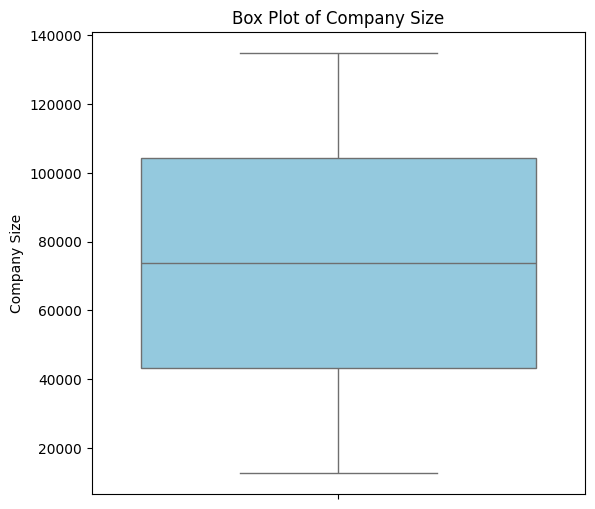

In [60]:
plt.figure(figsize=(14, 6))

# Boxplot for Company Size
plt.subplot(1, 2, 1)
sns.boxplot(y=job_salary_df['Company Size'], color='skyblue')
plt.title('Box Plot of Company Size')

#### *No Outliers in Company Size*

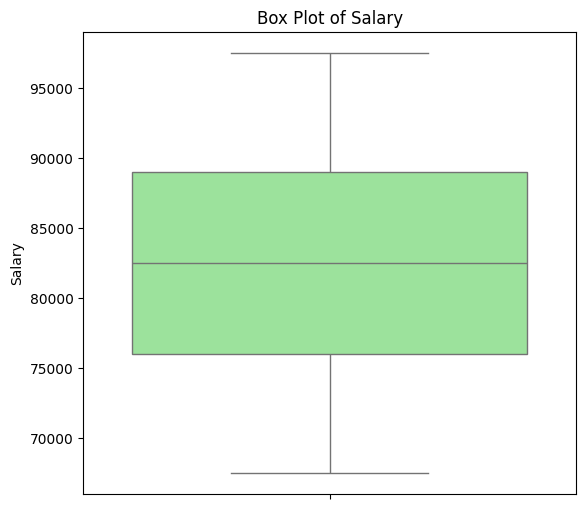

In [62]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=job_salary_df['Salary'], color='lightgreen')
plt.title('Box Plot of Salary')

plt.show()

#### *No Outliers in Salary*

### ***Dataset Overview After Cleaning and Transformation***

In [ ]:
job_salary_df_visualization.describe()

,Company Size,Min Experience,Max Experience,Salary,Job Post Age (Days),Job Posting Year
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.370591e+04,2.501410e+00,1.149676e+01,8.249193e+04,9.259160e+02,2.022206e+03
std,3.530437e+04,1.708398e+00,2.291408e+00,7.528770e+03,2.111549e+02,6.774980e-01
min,1.264600e+04,0.000000e+00,8.000000e+00,6.750000e+04,5.610000e+02,2.021000e+03
25%,4.312100e+04,1.000000e+00,9.000000e+00,7.600000e+04,7.430000e+02,2.022000e+03
50%,7.364100e+04,3.000000e+00,1.100000e+01,8.250000e+04,9.260000e+02,2.022000e+03
75%,1.043175e+05,4.000000e+00,1.300000e+01,8.900000e+04,1.109000e+03,2.023000e+03
max,1.348340e+05,5.000000e+00,1.500000e+01,9.750000e+04,1.291000e+03,2.023000e+03


In [63]:
job_salary_df_visualization.head()

,Qualifications,Work Type,Company Size,Preference,Benefits,Company,Min Experience,Max Experience,Salary,Job Post Age (Days),Job Posting Year,Location,Job Profile
0,M.Tech,Intern,26801,Female,"{'Flexible Spending Accounts (FSAs), Relocatio...",Icahn Enterprises,5,15,79000.0,1070,2022,Isle of Man - Douglas,Digital Marketing Specialist - Social Media Ma...
1,BCA,Intern,100340,Female,"{'Health Insurance, Retirement Plans, Paid Tim...",PNC Financial Services Group,2,12,86000.0,831,2022,Turkmenistan - Ashgabat,Web Developer - Frontend Web Developer
2,PhD,Temporary,84525,Male,"{'Legal Assistance, Bonuses and Incentive Prog...",United Services Automobile Assn.,0,12,82500.0,927,2022,"Macao SAR, China - Macao",Operations Manager - Quality Control Manager
3,PhD,Full-Time,129896,Female,"{'Transportation Benefits, Professional Develo...",Hess,4,11,78000.0,763,2023,Benin - Porto-Novo,Network Engineer - Wireless Network Engineer
4,MBA,Intern,53944,Female,"{'Flexible Spending Accounts (FSAs), Relocatio...",Cairn Energy,1,12,75500.0,900,2022,Chile - Santiago,Event Manager - Conference Manager
